In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator

In [5]:
# reading Dataset
df = pd.read_csv('C://Users/akaks/Downloads/monthly_milk_production.csv',index_col='Date',parse_dates=True)

In [82]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: xlabel='Date'>

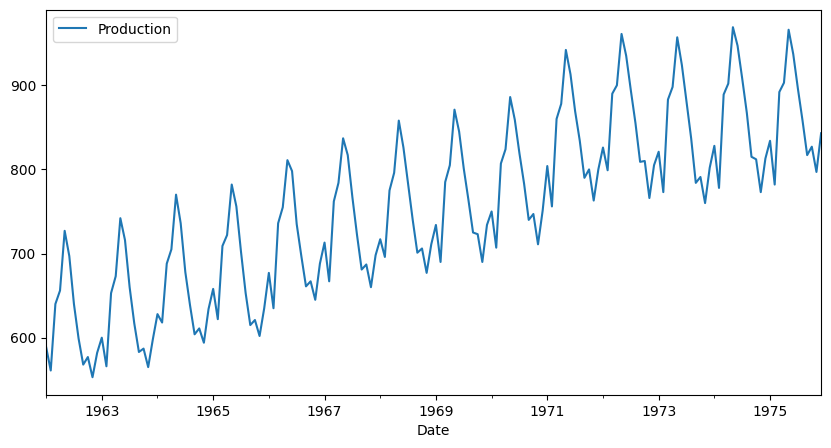

In [83]:
# plotting the data
df.plot(figsize=(10,5))

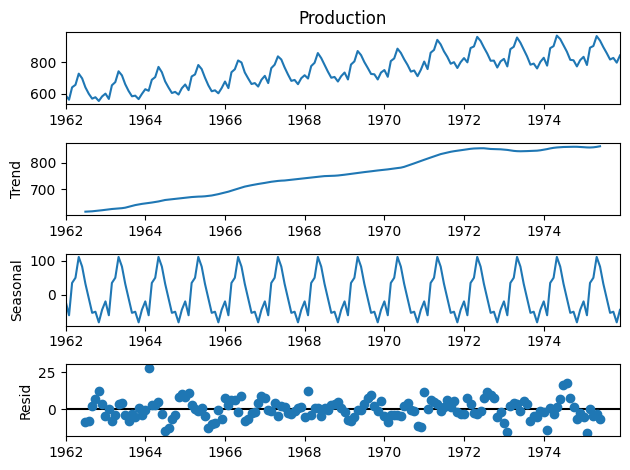

In [11]:
# checking the trend, seasonality in the data
results = seasonal_decompose(df['Production'])
results.plot();

In [14]:
# dividing t=into training and testing set
train = df.iloc[:156]
test = df.iloc[156:]

In [15]:
# standardizing the data
mn = MinMaxScaler()
mn.fit(train)
sc_train = mn.transform(train)
sc_test = mn.transform(test)

In [26]:
# generating the data 
generator = TimeseriesGenerator(sc_train,sc_train,length=12,batch_size=1)

In [84]:
# Creating the model
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(12,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Training the model on data
model.fit(generator,epochs=50)

Epoch 1/50
144/144 [==============================] - 6s 13ms/step - loss: 0.0395
Epoch 2/50
144/144 [==============================] - 2s 13ms/step - loss: 0.0239
Epoch 3/50
144/144 [==============================] - 2s 14ms/step - loss: 0.0180
Epoch 4/50
144/144 [==============================] - 2s 15ms/step - loss: 0.0152
Epoch 5/50
144/144 [==============================] - 2s 13ms/step - loss: 0.0098
Epoch 6/50
144/144 [==============================] - 2s 13ms/step - loss: 0.0143
Epoch 7/50
144/144 [==============================] - 2s 13ms/step - loss: 0.0096
Epoch 8/50
144/144 [==============================] - 2s 13ms/step - loss: 0.0053
Epoch 9/50
144/144 [==============================] - 2s 13ms/step - loss: 0.0038
Epoch 10/50
144/144 [==============================] - 2s 13ms/step - loss: 0.0050
Epoch 11/50
144/144 [==============================] - 2s 13ms/step - loss: 0.0038
Epoch 12/50
144/144 [==============================] - 2s 13ms/step - loss: 0.0039
Epoch 13/50
1

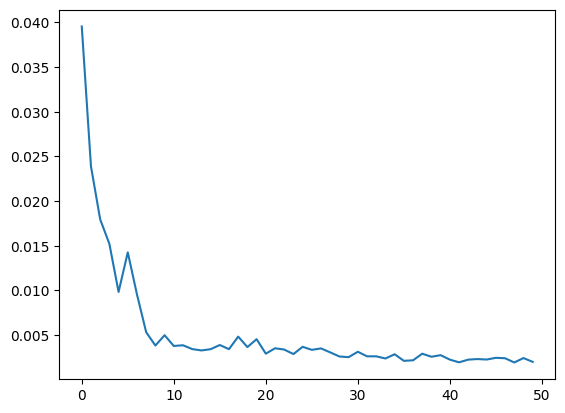

In [44]:
# plotting the loss
loss = model.history.history['loss']
plt.plot(range(len(loss)),loss)

In [65]:
# Making predictions
test_preds = []
first_batch = sc_train[-12:]
current_batch = first_batch.reshape(1,12,1)

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_preds.append(current_pred)
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 65ms/step


In [66]:
test_preds

[array([0.71180195], dtype=float32),
 array([0.68199086], dtype=float32),
 array([0.89614964], dtype=float32),
 array([0.96997917], dtype=float32),
 array([1.0931127], dtype=float32),
 array([1.0753154], dtype=float32),
 array([0.99059635], dtype=float32),
 array([0.8717455], dtype=float32),
 array([0.737793], dtype=float32),
 array([0.6883912], dtype=float32),
 array([0.6271234], dtype=float32),
 array([0.6789375], dtype=float32)]

In [75]:
# inverse transform
predictions = mn.inverse_transform(test_preds)

In [77]:
test['prediction'] = predictions

C:\Users\akaks\AppData\Local\Temp\ipykernel_15508\2206935642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = predictions


In [78]:
test

,Production,prediction
Date,,
1975-01-01,834,849.109610
1975-02-01,782,836.708199
1975-03-01,892,925.798248
1975-04-01,903,956.511333
1975-05-01,966,1007.734886
1975-06-01,937,1000.331188
1975-07-01,896,965.088083
1975-08-01,858,915.646139
1975-09-01,817,859.921900


<Axes: xlabel='Date'>

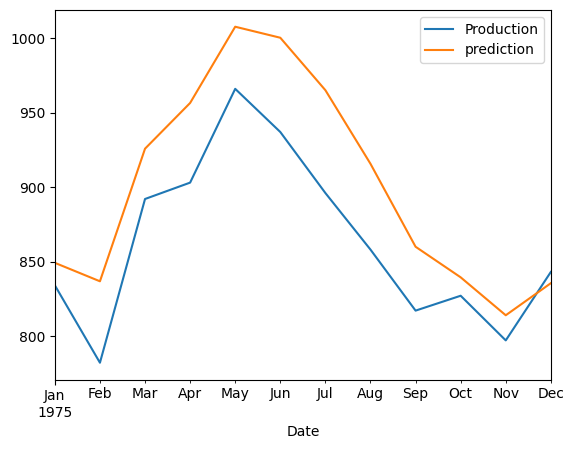

In [79]:
# plotting predictions vs actual values
test.plot()